# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

from watermark import watermark
from warnings import filterwarnings
filterwarnings("ignore")
print(watermark())
print(watermark(iversions=True, globals_=globals()))

%matplotlib inline

Last updated: 2022-11-01T22:10:28.955327-07:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 22.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

requests        : 2.28.1
json            : 2.0.9
alpaca_trade_api: 2.3.0
pandas          : 1.3.5



In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income=12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3))


{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 19196000,
         "total_supply": 19196000,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 20529.0,
               "volume_24h": 31383338467,
               "market_cap": 393938401326,
               "percentage_change_1h": 0.0278862036827193,
               "percentage_change_24h": 0.0077612894107168,
               "percentage_change_7d": 2.15664882632156,
               "percent_change_1h": 0.0278862036827193,
               "percent_change_24h": 0.0077612894107168,
               "percent_change_7d": 2.15664882632156
            }
         },
         "last_updated": 1667365743
      }
   },
   "metadata": {
      "timestamp": 1667365743,
      "num_cryptocurrencies": 3116,
      "error": null
   }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3))


{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 120522970,
         "total_supply": 120522970,
         "max_supply": 120522970,
         "quotes": {
            "USD": {
               "price": 1597.91,
               "volume_24h": 18522376651,
               "market_cap": 191733657310,
               "percentage_change_1h": 0.464054459129568,
               "percentage_change_24h": 0.301188215159526,
               "percentage_change_7d": 9.29265809495944,
               "percent_change_1h": 0.464054459129568,
               "percent_change_24h": 0.301188215159526,
               "percent_change_7d": 9.29265809495944
            }
         },
         "last_updated": 1667365755
      }
   },
   "metadata": {
      "timestamp": 1667365755,
      "num_cryptocurrencies": 3116,
      "error": null
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"Current price of BTC is {btc_price:0.2f} USD")


Current price of BTC is 20529.00 USD


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"Current price of ETH is {eth_price:0.2f} USD")


Current price of ETH is 1597.91 USD


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f"Current value of BTC holding is {btc_value:0.2f} USD")


Current value of BTC holding is 24634.80 USD


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f"Current value of ETH holding is {eth_value:0.2f} USD")


Current value of ETH holding is 8468.92 USD


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance
print(f"Current cryptocurrency wallet balance is {total_crypto_wallet:0.2f} USD")

Current cryptocurrency wallet balance is 33103.72 USD


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Create the Alpaca tradeapi.REST object
type(alpaca_api_key)

str

In [16]:
type(alpaca_secret_key)

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [17]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers=["SPY","AGG"]

# Set timeframe to 1Day
timeframe="1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
today=pd.Timestamp("2022-10-28",tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [18]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio=alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
AGG=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_portfolio=pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-10-28 04:00:00+00:00  379.87  389.52  379.68  389.02  100160252   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2022-10-28 04:00:00+00:00      597379  385.648651  95.01  95.46  94.98  95.22   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2022-10-28 04:00:00+00:00  6224403       25972  95.234097

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [19]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
df_closing_price_agg=pd.DataFrame()
df_closing_price_agg["AGG"]=df_portfolio["AGG"]["close"]

# Print the AGG closing price
df_closing_price_agg.head()


,AGG
timestamp,
2022-10-28 04:00:00+00:00,95.22


In [20]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
df_closing_price_spy= pd.DataFrame()
df_closing_price_spy["SPY"]=df_portfolio["SPY"]["close"]
# Print the SPY closing price
# YOUR CODE HERE
df_closing_price_spy.head()


,SPY
timestamp,
2022-10-28 04:00:00+00:00,389.02


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [21]:
# Calculate the current value of the bond portion of the portfolio
agg_value=df_closing_price_agg*agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value


,AGG
timestamp,
2022-10-28 04:00:00+00:00,19044.0


In [22]:
# Calculate the current value of the stock portion of the portfolio
spy_value=df_closing_price_spy*spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

,SPY
timestamp,
2022-10-28 04:00:00+00:00,42792.2


In [23]:
agg_value.iloc[0,0]

19044.0

In [24]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds=spy_value.iloc[0,0]+agg_value.iloc[0,0]

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f"Current balance of the stock and bond portion of the portfolio is {total_stocks_bonds:0.2f} USD")

Current balance of the stock and bond portion of the portfolio is 61836.20 USD


In [25]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio=total_stocks_bonds+total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of the portfolio is: {total_crypto_wallet:0.2f} USD")
print(f"The current cryptocurrency wallet balance is: {total_portfolio:0.2f} USD")


The total value of the portfolio is: 33103.72 USD
The current cryptocurrency wallet balance is: 94939.92 USD


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [26]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data=[total_stocks_bonds,total_crypto_wallet]
# Review the Python list savings_data
# YOUR CODE HERE
print(savings_data)
    

[61836.2, 33103.723]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [27]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df=pd.DataFrame(savings_data,columns=['Amount'],index=["stock/bond","crypto"])
# Display the savings_df DataFrame
# YOUR CODE HERE
display(savings_df)


,Amount
stock/bond,61836.200
crypto,33103.723


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

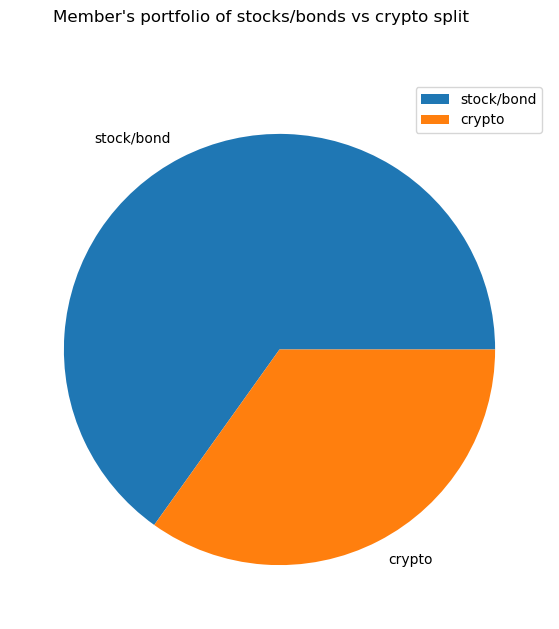

In [28]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
plot=savings_df.plot.pie(subplots=True,figsize=(15, 7),title="Member's portfolio of stocks/bonds vs crypto split",ylabel="")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [29]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value=monthly_income*3
print(f"The emergency fund value for the member is {emergency_fund_value:0.2f} USD")

The emergency fund value for the member is 36000.00 USD


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [30]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! Member has enough money in this fund")
elif total_portfolio == emergency_fund_value:
    print("Great Job! Member has reached an important financial goal")
else:
    print(f"Member is {emergency_fund_value-total_portfolio:0.2f} USD away from reaching their financial goal")

Congratulations! Member has enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [31]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-10-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-30", tz="America/New_York").isoformat()

In [32]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
df_ticker=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY=df_ticker[df_ticker['symbol']=='SPY'].drop('symbol',axis=1)
AGG=df_ticker[df_ticker['symbol']=='AGG'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_ticker=pd.concat([SPY, AGG],axis=1,keys=["SPY","AGG"])
# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(df_ticker.head())
print("______________________________________________________________________")
display(df_ticker.tail())

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-10-31 04:00:00+00:00  304.12  304.1300  301.73  303.33  68989134   
2019-11-01 04:00:00+00:00  304.92  306.1900  304.74  306.17  71142015   
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2019-10-31 04:00:00+00:00      319480  302.777857  112.98  113.300  112.890   
2019-11-01 04:00:00+00:00      321897  305.482057  112.98  113.105  112.805   
2019-11-04 05:00:00+00:00      217934  307.058902  112.71  112.720  112.590   
2019-11-05 05:00:00+00:00      210376  307.186604  112.35  112.380  112.150   
2019-11-06 05:00:00+00:00      217559  306.885517  112.40  112.510  112.260   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-10-31 04:00:00+00:00  113.15  5416778       16070  113.175644  
2019-11-01 04:00:00+00:00  112.93  4001678       17210  112.927582  
2019-11-04 05:00:00+00:00  112.65  2723845       11743  112.644988  
2019-11-05 05:00:00+00:00  112.23  3766399       10707  112.237379  
2019-11-06 05:00:00+00:00  112.40  3908982       11879  112.416874

______________________________________________________________________


SPY                                      \
                             open    high      low   close     volume   
timestamp                                                               
2022-10-24 04:00:00+00:00  375.89  380.06  373.110  378.87   85131661   
2022-10-25 04:00:00+00:00  378.79  385.25  378.671  384.92   78656471   
2022-10-26 04:00:00+00:00  381.62  387.58  381.350  382.02  103779972   
2022-10-27 04:00:00+00:00  383.07  385.00  379.330  379.98   81650038   
2022-10-28 04:00:00+00:00  379.87  389.52  379.680  389.02  100160252   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2022-10-24 04:00:00+00:00      624488  377.367392  93.77  94.0300  93.45   
2022-10-25 04:00:00+00:00      598158  382.991850  94.39  94.7050  94.36   
2022-10-26 04:00:00+00:00      657066  383.877161  94.78  95.1700  94.76   
2022-10-27 04:00:00+00:00      599316  381.339490  95.21  95.6204  94.99   
2022-10-28 04:00:00+00:00      597379  385.648651  95.01  95.4600  94.98   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-10-24 04:00:00+00:00  93.64   5898426       20905  93.735409  
2022-10-25 04:00:00+00:00  94.56  11361895       35359  94.522662  
2022-10-26 04:00:00+00:00  94.98   7836932       26772  94.951876  
2022-10-27 04:00:00+00:00  95.46   6874350       22018  95.420278  
2022-10-28 04:00:00+00:00  95.22   6224403       25972  95.234097

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [33]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
thirty_year_simulation=MCSimulation(
    portfolio_data=df_ticker,
    weights=[0.60,0.40],
    num_simulation=500,
    num_trading_days=252*30,
)
# Review the simulation input data
# YOUR CODE HERE
thirty_year_simulation.portfolio_data.head()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-10-31 04:00:00+00:00  304.12  304.1300  301.73  303.33  68989134   
2019-11-01 04:00:00+00:00  304.92  306.1900  304.74  306.17  71142015   
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-31 04:00:00+00:00      319480  302.777857          NaN  112.98   
2019-11-01 04:00:00+00:00      321897  305.482057     0.009363  112.98   
2019-11-04 05:00:00+00:00      217934  307.058902     0.003919  112.71   
2019-11-05 05:00:00+00:00      210376  307.186604    -0.001074  112.35   
2019-11-06 05:00:00+00:00      217559  306.885517     0.000098  112.40   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2019-10-31 04:00:00+00:00  113.300  112.890  113.15  5416778       16070   
2019-11-01 04:00:00+00:00  113.105  112.805  112.93  4001678       17210   
2019-11-04 05:00:00+00:00  112.720  112.590  112.65  2723845       11743   
2019-11-05 05:00:00+00:00  112.380  112.150  112.23  3766399       10707   
2019-11-06 05:00:00+00:00  112.510  112.260  112.40  3908982       11879   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-31 04:00:00+00:00  113.175644          NaN  
2019-11-01 04:00:00+00:00  112.927582    -0.001944  
2019-11-04 05:00:00+00:00  112.644988    -0.002479  
2019-11-05 05:00:00+00:00  112.237379    -0.003728  
2019-11-06 05:00:00+00:00  112.416874     0.001515

In [34]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001915,1.010642,1.002268,0.995229,1.007349,1.003812,0.996818,1.008228,1.005841,1.006882,...,1.007026,1.000665,0.974362,0.997117,1.002474,0.984091,1.002803,0.992119,1.007082,0.994817
2,1.004837,1.009445,1.018728,1.006919,1.007371,1.013618,0.997759,0.996907,1.009822,1.006720,...,1.013824,1.002523,0.981837,1.005673,1.006277,0.981386,1.005673,0.972368,1.022390,0.988107
3,0.996314,1.017829,1.014442,0.997657,1.005058,1.013338,0.981234,0.993070,1.010415,1.011900,...,1.019797,1.004344,0.986946,1.024667,1.007814,0.982068,1.007365,0.959155,1.035220,0.997888
4,0.999291,1.030530,1.024093,1.009439,1.016558,1.001328,0.991568,0.997483,1.023044,1.008503,...,1.029360,1.013137,0.984779,1.033990,0.995856,0.983158,1.004166,0.968314,1.031234,0.998903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.246030,1.325795,10.283099,2.759704,0.897204,1.530341,10.302867,1.177805,1.848852,6.198926,...,4.978602,4.241537,3.592201,5.692732,1.484187,0.478876,0.540114,0.653969,5.536175,1.628223
7557,1.227902,1.324850,10.338521,2.737591,0.909380,1.515584,10.230313,1.163990,1.848436,6.251777,...,4.936081,4.190811,3.594301,5.628968,1.476647,0.470600,0.545333,0.652894,5.515100,1.600184
7558,1.211011,1.344512,10.287503,2.783304,0.904584,1.522781,10.401110,1.152283,1.823086,6.320794,...,5.033922,4.231112,3.571129,5.579191,1.505681,0.471315,0.544989,0.659471,5.440954,1.603791
7559,1.204599,1.324470,10.273833,2.801158,0.902162,1.519858,10.502415,1.141360,1.794833,6.320770,...,5.066492,4.243521,3.557516,5.595225,1.509541,0.471055,0.544468,0.655588,5.416357,1.607819


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

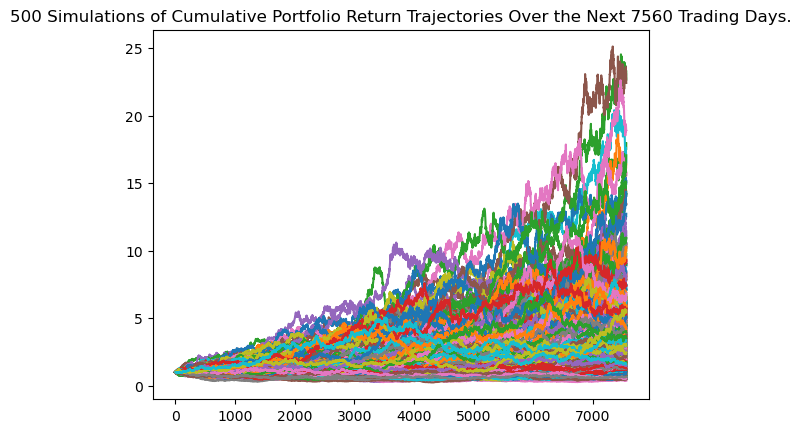

In [35]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
thirty_year_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

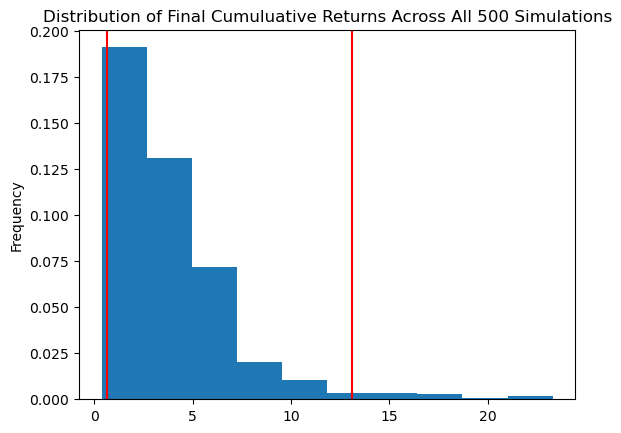

In [36]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
thirty_year_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [37]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
thirty_year_simulation_stat=thirty_year_simulation.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
thirty_year_simulation_stat.describe()

count     10.000000
mean      55.406925
std      156.374746
min        0.380019
25%        1.937234
50%        3.506430
75%       11.108523
max      500.000000
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [38]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"Current balance of the stock and bond portions of the member's portfolio is {total_stocks_bonds:0.2f} USD")

Current balance of the stock and bond portions of the member's portfolio is 61836.20 USD


In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(thirty_year_simulation_stat[8]*total_portfolio,2)
ci_upper_thirty_cumulative_return = round(thirty_year_simulation_stat[9]*total_portfolio,2)

# Print the result of your calculations
# YOUR CODE HERE
print(f"With an initial investment of {total_portfolio:0.2f} USD towards the portfolio for the next 30 years will yield a range of {ci_lower_thirty_cumulative_return: .2f} USD and {ci_upper_thirty_cumulative_return: .2f} USD.")


With an initial investment of 94939.92 USD towards the portfolio for the next 30 years will yield a range of  60746.76 USD and  1245417.48 USD.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [40]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
ten_year_simulation=MCSimulation(
    portfolio_data=df_ticker,
    weights=[0.80,0.20],
    num_simulation=500,
    num_trading_days=252*10,
)

# Review the simulation input data
# YOUR CODE HERE
ten_year_simulation.portfolio_data.head()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-10-31 04:00:00+00:00  304.12  304.1300  301.73  303.33  68989134   
2019-11-01 04:00:00+00:00  304.92  306.1900  304.74  306.17  71142015   
2019-11-04 05:00:00+00:00  307.86  308.0000  306.96  307.37  60606916   
2019-11-05 05:00:00+00:00  307.59  307.9195  306.71  307.04  42955771   
2019-11-06 05:00:00+00:00  307.03  307.4000  306.06  307.07  46487108   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-31 04:00:00+00:00      319480  302.777857          NaN  112.98   
2019-11-01 04:00:00+00:00      321897  305.482057     0.009363  112.98   
2019-11-04 05:00:00+00:00      217934  307.058902     0.003919  112.71   
2019-11-05 05:00:00+00:00      210376  307.186604    -0.001074  112.35   
2019-11-06 05:00:00+00:00      217559  306.885517     0.000098  112.40   

                                                                          \
                              high      low   close   volume trade_count   
timestamp                                                                  
2019-10-31 04:00:00+00:00  113.300  112.890  113.15  5416778       16070   
2019-11-01 04:00:00+00:00  113.105  112.805  112.93  4001678       17210   
2019-11-04 05:00:00+00:00  112.720  112.590  112.65  2723845       11743   
2019-11-05 05:00:00+00:00  112.380  112.150  112.23  3766399       10707   
2019-11-06 05:00:00+00:00  112.510  112.260  112.40  3908982       11879   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-31 04:00:00+00:00  113.175644          NaN  
2019-11-01 04:00:00+00:00  112.927582    -0.001944  
2019-11-04 05:00:00+00:00  112.644988    -0.002479  
2019-11-05 05:00:00+00:00  112.237379    -0.003728  
2019-11-06 05:00:00+00:00  112.416874     0.001515

In [41]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996667,0.998411,0.996115,1.008139,1.015842,1.035934,1.025244,1.027426,1.009858,1.031121,...,0.998785,1.004980,1.007013,1.007166,1.001162,0.967759,0.989550,0.993139,1.004538,0.986181
2,0.990540,0.999238,0.992980,1.011790,1.019001,1.057547,1.020320,1.003355,1.018867,1.022323,...,1.000240,0.987483,1.017653,0.986521,0.991561,0.962737,0.979519,1.001989,1.009367,0.997002
3,1.022412,0.997870,0.982056,1.017515,1.024911,1.053571,1.015278,0.994241,1.022236,1.021070,...,0.987742,0.984540,1.017213,0.980252,0.988597,0.952873,0.962227,1.002011,1.020332,0.976526
4,1.020516,0.993284,0.992898,1.028412,1.028183,1.050994,1.038261,1.002544,1.034856,1.013868,...,0.994142,0.964068,1.026620,0.985636,0.995645,0.990616,0.967394,1.029248,1.047815,0.973847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.412930,0.306199,1.457992,0.736663,1.889009,3.977862,1.097933,0.616676,0.848408,1.286722,...,2.945815,1.020515,2.295248,1.279527,0.752824,1.565091,0.941560,0.916487,0.802846,2.107448
2517,2.377933,0.306282,1.480950,0.719378,1.882180,4.039517,1.116618,0.614888,0.854549,1.283656,...,2.970929,1.026133,2.272306,1.298093,0.767838,1.563656,0.939402,0.904063,0.804383,2.113105
2518,2.339752,0.309207,1.477739,0.705867,1.908220,4.081591,1.127545,0.602766,0.865534,1.289477,...,2.938658,1.038912,2.271506,1.284168,0.766865,1.547788,0.947246,0.892389,0.801606,2.106525
2519,2.335057,0.308698,1.495194,0.706015,1.910386,4.081662,1.124493,0.599075,0.875822,1.291107,...,2.902955,1.010572,2.318587,1.289563,0.770915,1.571742,0.956450,0.879134,0.815518,2.131368


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

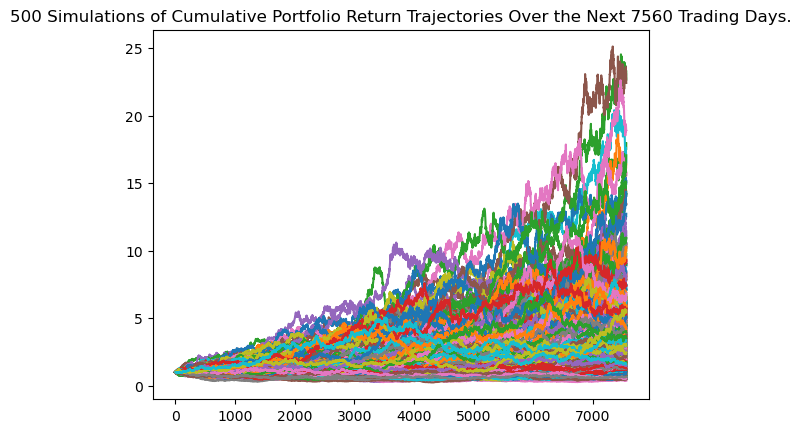

In [42]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

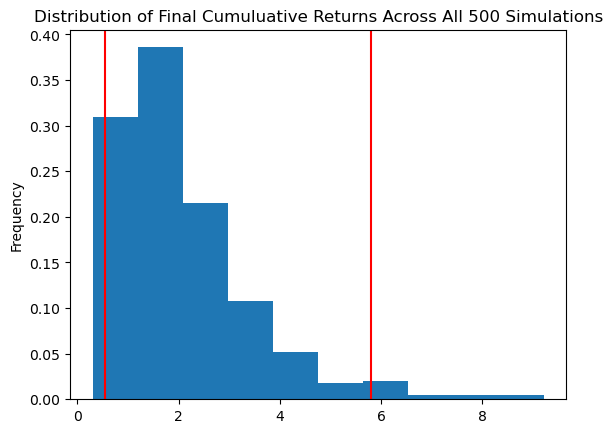

In [43]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
ten_year_simulation.plot_distribution()

In [44]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
ten_year_simulation_stats=ten_year_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
ten_year_simulation_stats.describe()

count     10.000000
mean      52.487650
std      157.263887
min        0.305016
25%        1.180734
50%        1.914070
75%        5.035230
max      500.000000
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [45]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"Current balance of the stock and bond portion of the member's portfolio is {total_portfolio:0.2f} USD")

Current balance of the stock and bond portion of the member's portfolio is 94939.92 USD


In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_95_lower_cumulative_return = round(ten_year_simulation_stats[8]*total_portfolio,2)
ci_95_upper_cumulative_return = round(ten_year_simulation_stats[9]*total_portfolio,2)

# Print the result of your calculations
# YOUR CODE HERE
print(f"With an initial investment of {total_portfolio:0.2f} USD towards the portfolio for the next 10 years will yield a range of {ci_lower_thirty_cumulative_return: .2f} USD and {ci_upper_thirty_cumulative_return: .2f} USD.")

With an initial investment of 94939.92 USD towards the portfolio for the next 10 years will yield a range of  60746.76 USD and  1245417.48 USD.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?